#### Import Libraries

In [5]:
import shutil
import random
import math
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import pandas as pd

#### Datasets

In [7]:
(trainX, trainy), (testX, testy) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 42s 0us/step


In [8]:
print("Training Shape (X): ", trainX.shape)
print("Training Shape (Y): ", trainy.shape)
print("Testing Shape (X): ", testX.shape)
print("Testing Shape (Y): ", testy.shape)

Training Shape (X):  (50000, 32, 32, 3)
Training Shape (Y):  (50000, 1)
Testing Shape (X):  (10000, 32, 32, 3)
Testing Shape (Y):  (10000, 1)


In [9]:
trainY = tf.keras.utils.to_categorical(trainy)
testY = tf.keras.utils.to_categorical(testy)

#### CNN Model 

In [33]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Rescaling(1./255))

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])

earlyStopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=20, verbose=1)

In [34]:
EPOCHS = 150

history = model.fit(
    trainX, trainY,
    validation_data=(testX, testY),
    batch_size=64,
    epochs = EPOCHS,
    callbacks=[earlyStopping]
)

Epoch 1/150
782/782 [==============================] - 8s 9ms/step - loss: 1.7169 - accuracy: 0.3701 - val_loss: 1.4308 - val_accuracy: 0.4694
Epoch 2/150
782/782 [==============================] - 7s 9ms/step - loss: 1.3411 - accuracy: 0.5194 - val_loss: 1.1457 - val_accuracy: 0.5858
Epoch 3/150
782/782 [==============================] - 7s 8ms/step - loss: 1.1898 - accuracy: 0.5778 - val_loss: 1.1708 - val_accuracy: 0.5858
Epoch 4/150
782/782 [==============================] - 7s 8ms/step - loss: 1.0941 - accuracy: 0.6155 - val_loss: 0.9911 - val_accuracy: 0.6409
Epoch 5/150
782/782 [==============================] - 7s 8ms/step - loss: 1.0234 - accuracy: 0.6417 - val_loss: 0.9483 - val_accuracy: 0.6593
Epoch 6/150
782/782 [==============================] - 7s 9ms/step - loss: 0.9734 - accuracy: 0.6608 - val_loss: 0.9054 - val_accuracy: 0.6838
Epoch 7/150
782/782 [==============================] - 7s 8ms/step - loss: 0.9320 - accuracy: 0.6743 - val_loss: 0.8628 - val_accuracy: 0.7015

In [35]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_30 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_30 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_37 (Dropout)        (None, 30, 30, 32)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                 

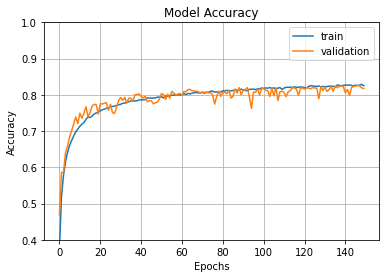

313/313 [==============================] - 1s 5ms/step - loss: 0.5383 - accuracy: 0.8172


[0.538262128829956, 0.8172000050544739]

In [36]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()
model.evaluate(testX, testY)

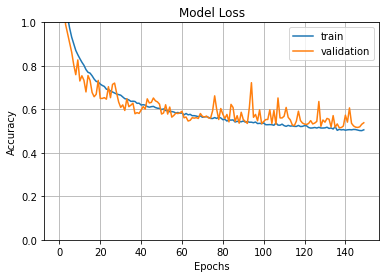

In [37]:
fig1 = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.axis(ymin=0,ymax=1)
plt.grid()
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()